# CDS503: Machine Learning

***
## LAB 3 Exercise: Potential Answer for Decision Tree Algorithm

***
### Step1: Business Understanding

***

This data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


### Step 2: Data Understanding

#### Description of the data:
In the baknote data set, there are five attributes including the class attribute indicating the class information. 
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')                                                            
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

colNames = ['variance', 'skewness', 'curtosis','entropy','Class']
#Add different formats of missing value
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
#read again training data
df = pd.read_csv("banknote.csv", names=colNames, na_values = missing_value_formats)
df.shape

(1372, 5)

***
### Visualizing The Data

While visualizing is made easy using `seaborn` library, it does limits the **ways** to manipulate the visual *aesthetics* of the plot. Nevertheless, the following showed some *examples* of advance plots on the data. Check this link for further exploration using advance plot of seaborn library: https://seaborn.pydata.org/tutorial/distributions.html

(5.5, -0.5)

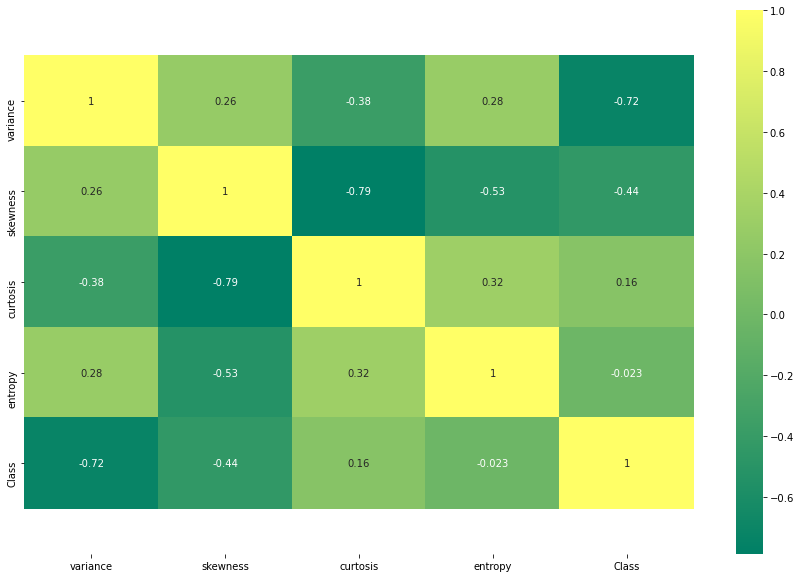

In [3]:
import seaborn as sns

# correlations using heat map plot
plt.figure(figsize=(15,10))
cor = df.corr()
ax = sns.heatmap(df.corr(),annot=True,cmap='summer', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Here is the formula. In this step, we eliminate the highly correlated features by assigning the threshold value. 0.5 is the most commonly used value by most researchers. However, we can always assign our own value, if we have a justification and reason to do it.

In [4]:
threshold = 0.5

cor_criterion = abs(cor["Class"])

relevant_features = cor_criterion[cor_criterion>threshold]
relevant_features = relevant_features.reset_index()
relevant_features.columns = ['Variables', 'Correlation']
relevant_features = relevant_features.sort_values(by='Correlation', ascending=False)
relevant_features

,Variables,Correlation
1,Class,1.000000
0,variance,0.724843


<AxesSubplot:xlabel='Class', ylabel='count'>

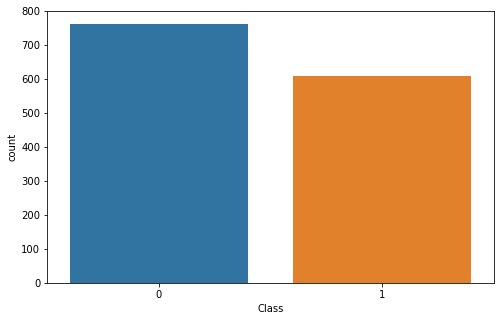

In [5]:
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="Class", data=df)

***
### Step 3: Data Preparation

In [6]:
# select all columns except the last one (the target label)
x=df.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y=df.iloc[:,4]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

Check the data so far:

In [7]:
print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
      variance   skewness  curtosis  entropy
1023  -1.77130 -10.766500  10.21840 -1.00430
642    5.13210  -0.031048   0.32616  1.11510
1196  -2.01490   3.687400  -1.93850 -3.89180
31     1.48840   3.627400   3.30800  0.48921
253    5.28680   3.257000  -1.37210  1.16680
...        ...        ...       ...      ...
1337   0.23460  -4.515200   2.11950  1.44480
1343  -0.95923  -6.712800   4.98570  0.32886
689    3.02420  -3.337800   2.58650 -0.54785
1320  -0.72068  -6.758300   5.84080  0.62369
264    2.48300   6.615500  -0.79287 -0.90863

[549 rows x 4 columns]
-------- x axis train ---------
      variance   skewness  curtosis   entropy
101    4.55970  -2.421100  2.641300  1.616800
13    -1.57680  10.843000  2.546200 -2.936200
1269  -2.12410  -6.896900  5.599200 -0.471560
686    0.76163   5.820900  1.195900 -0.646130
965   -0.21394  -0.682870  0.096532  1.196500
...        ...        ...       ...       ...
763    0.39012  -0.142790 -0.031994  0.350840
835 

In [8]:
y_train.value_counts()

0    456
1    367
Name: Class, dtype: int64

In [9]:
IR = 456/367
print(IR)

1.2425068119891007


Since IR = 1.24, it is less than 1.5, hence the class is consider balanced.

***
### Step 4: Modelling
#### Classify using Decision Tree

We are using **DecisionTreeClassifier** sklearn package to run this sample.

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples.

There are plenty of parameters option you can play around and check if it able to improve the performance of your model.

- class sklearn.tree.DecisionTreeClassifier(*, criterion='gini/entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

Further reading: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### Step 5: Evaluation

From here, we apply the decision tree model and draw the results output using the `sklearn` confusion matrix. As such, we can justify and determine the *number* of instances being **correctly classified** and **misclassified**.

The classification report is about key metrics in a classification problem.

You'll have precision, recall, f1-score and support for each class you're trying to find.

- The **recall** means "how many of this class you find over the whole number of element of this class"

- The **precision** will be "how many are correctly classified among that class"

- The **f1-score** is the harmonic mean between precision & recall

- The **support** is the number of occurence of the given class in your dataset (so you have 11360 of class 0 and 3700 of class 1,   which is consider as imbalanced dataset with (IR = 3.07).

- In the case of **weighted average** the performance metrics are weighted accordingly:
  score weighted avg = (Class 0 %)(score class 0) + (Class 1 %)(score class 1)

- However, **macro avg** is not weighted and therefore
  score macro avg = 0.5(score class 0) + 0.5(score class 1)
  
The thing is, precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.

I would say that you don't really need to look at these metrics for this problem , unless a given class should absolutely be correctly determined.                                                                              

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       306
           1       0.98      0.99      0.98       243

    accuracy                           0.99       549
   macro avg       0.98      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549

The prediction accuracy is: 98.54%


Text(0.5, 51.0, 'Predicted label')

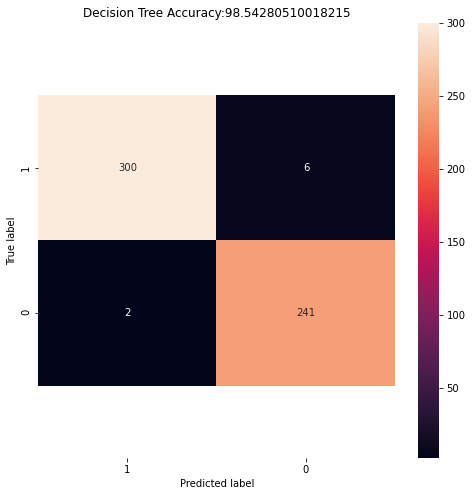

In [10]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)

print (classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['1','0'], 
                     columns = ['1','0'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       306
           1       0.97      0.98      0.98       243

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549

The prediction accuracy is: 98.00%


Text(0.5, 51.0, 'Predicted label')

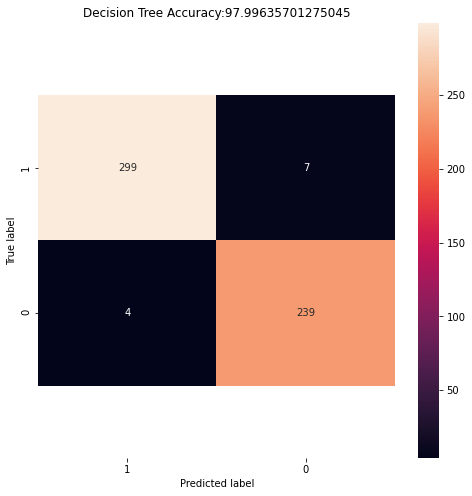

In [11]:
# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0, criterion = 'gini').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)

print (classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))


# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['1','0'], 
                     columns = ['1','0'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [12]:
#Doing a hyperparameter tuning to get the best parameter value

from sklearn.model_selection import GridSearchCV

grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [13]:
#results of best parameter value
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       306
           1       0.98      0.99      0.98       243

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549

The prediction accuracy is: 98.36%


Text(0.5, 51.0, 'Predicted label')

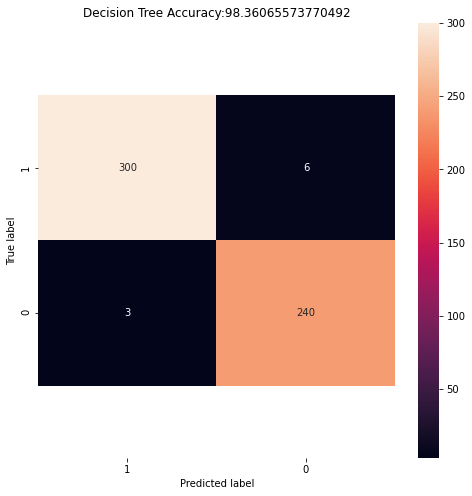

In [14]:
# input the decision tree classifier using the best parameter & train the model
dtree = DecisionTreeClassifier(random_state = 0, 
                               criterion = 'gini', 
                               max_depth= 11, 
                               min_samples_leaf= 3, 
                               min_samples_split= 2, 
                               splitter = 'random').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)

print (classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))


# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['1','0'], 
                     columns = ['1','0'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

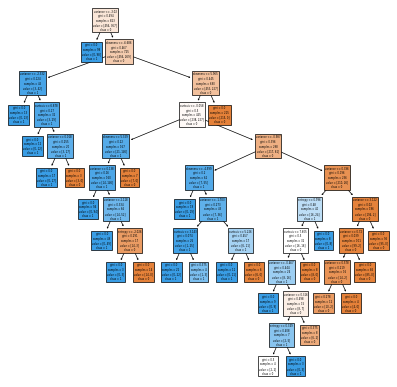

In [15]:
#Plotting the Tree
from sklearn import tree
fn = ["variance", "skewness", "curtosis","entropy","Class"]
cn = ["0","1"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=50)
tree.plot_tree(dtree, filled = True, feature_names = fn, class_names = cn);
fig.savefig('imagename.png')

***
### Summary

So far, the best model obtained is by using the default parameter. The data is consider quite a perfect data with almost well-balanced data, and normally distributed features. That helps to obtain very high accuracy when we do the modelling since the data is well behaved.